[A Survey of Transformers](https://arxiv.org/pdf/2106.04554.pdf)

[Transformer Classification](https://arxiv.org/pdf/2302.07730.pdf)

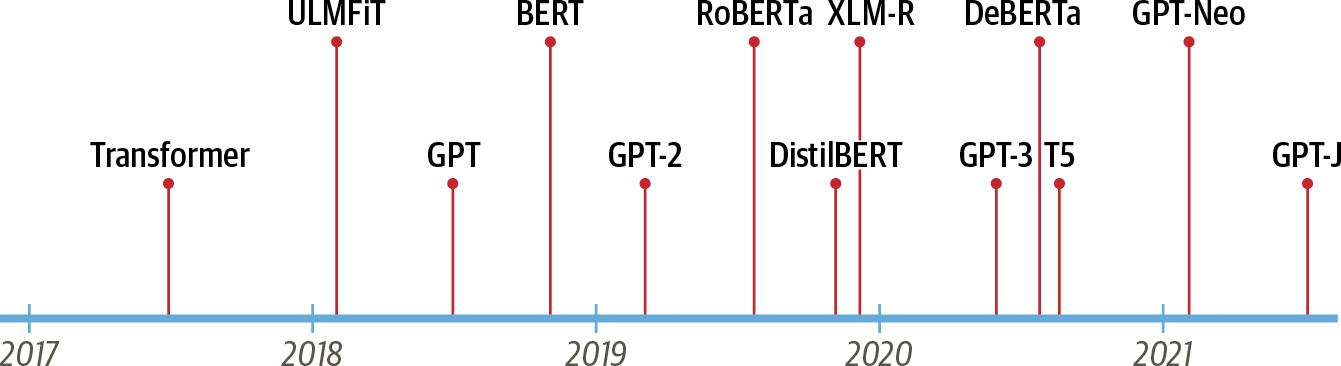
The transformers timeline  

The two of today's most well-known transformers: 
* the Generative Pretrained Transformers(GPT)
* Bidirectional Encoder Representations from Trandormers (BERT)
> ULMFiT showed that training long short-term memory (LSTM) networks on a very large and diverse corpus could **produce state-of-the-art text classifiers with little labeled data**.These advances were the catalysts for GPT and BERT

# The Encoder-Decoder Framework
 [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)

## The encoder-decoder atchitecture in RNN 
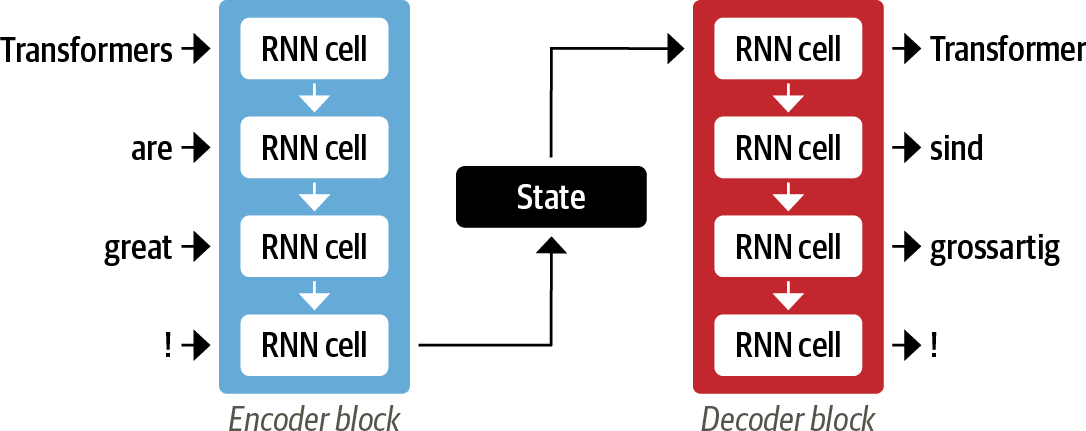
The English sentence "Transformers are great!" is encoded as a hidden state vector that is then decoded to produce the German translation "Transformer sind grossartig!"

## The weakness of this architecture
* The final hidden state of the encoder creates an *information bottleneck*: it has to **represent the meaning of the whole input sequence** because this is all the decoder has access to when generating the output. This is **especially challenging for long sequences**, where information at the start of the sequence might be lost in the process of compressing everything to a single, fixed representation.
> *attention* mechanism is designed to solve this problem. Although it is first used in RNN, it also the main builing blocks of the Transformer architecture.

# Attention Mechanisms
一些有用的博客

[The Illustrated attention](https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/)

[The Illustrated transformer](https://jalammar.github.io/illustrated-transformer/)

[The Illustrated bert](https://jalammar.github.io/illustrated-bert/)


### Fine-tuning method base on pretrained big model
[Universal Language Model Fine-tuning for Text Classification](https://paperswithcode.com/paper/universal-language-model-fine-tuning-for-text)

**Main Idea**:
1. attention背后的主要思想: encoder在每一步都输出一个decoder可以触达的隐藏state
2. 存在的问题：同时使用所有的state会极大增加decoder的输入量，所以需要设计一个评价state优先级的机制
3. 实际的“attention”：“attention”即一种参数，用于帮助decoder在每一步解码过程中区别encoder生成的所有states的权重

下图展示了在decoder预测第二个单词时如何利用attention机制

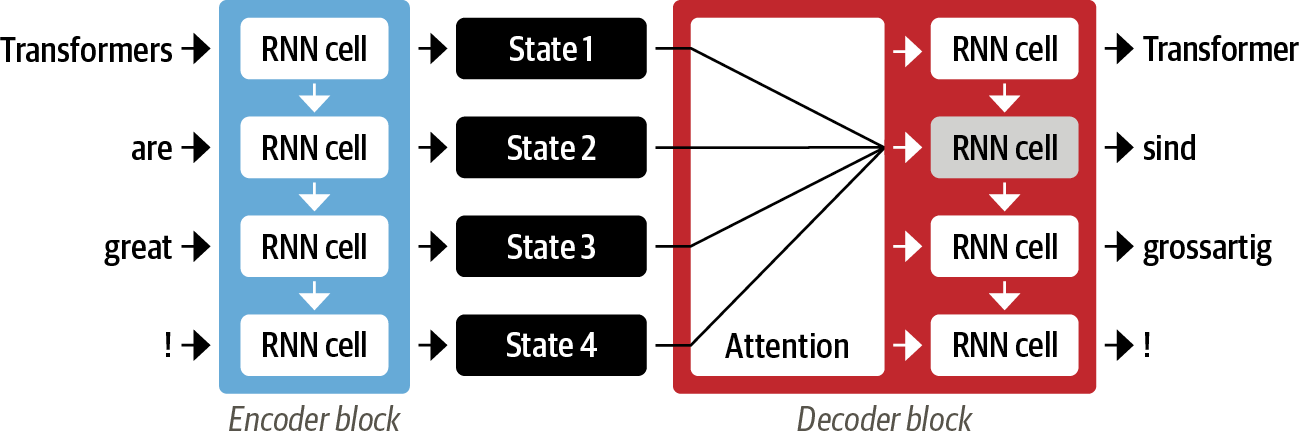

以英语到法语的翻译问题为例：  
为了让每一步输出时可以找到encoder中最相关的state，以attention为基础的模型可以学习到原句子和生成句子之间每个词对齐方式，如下图：decoder成功找到对齐词“zone”和“Area”
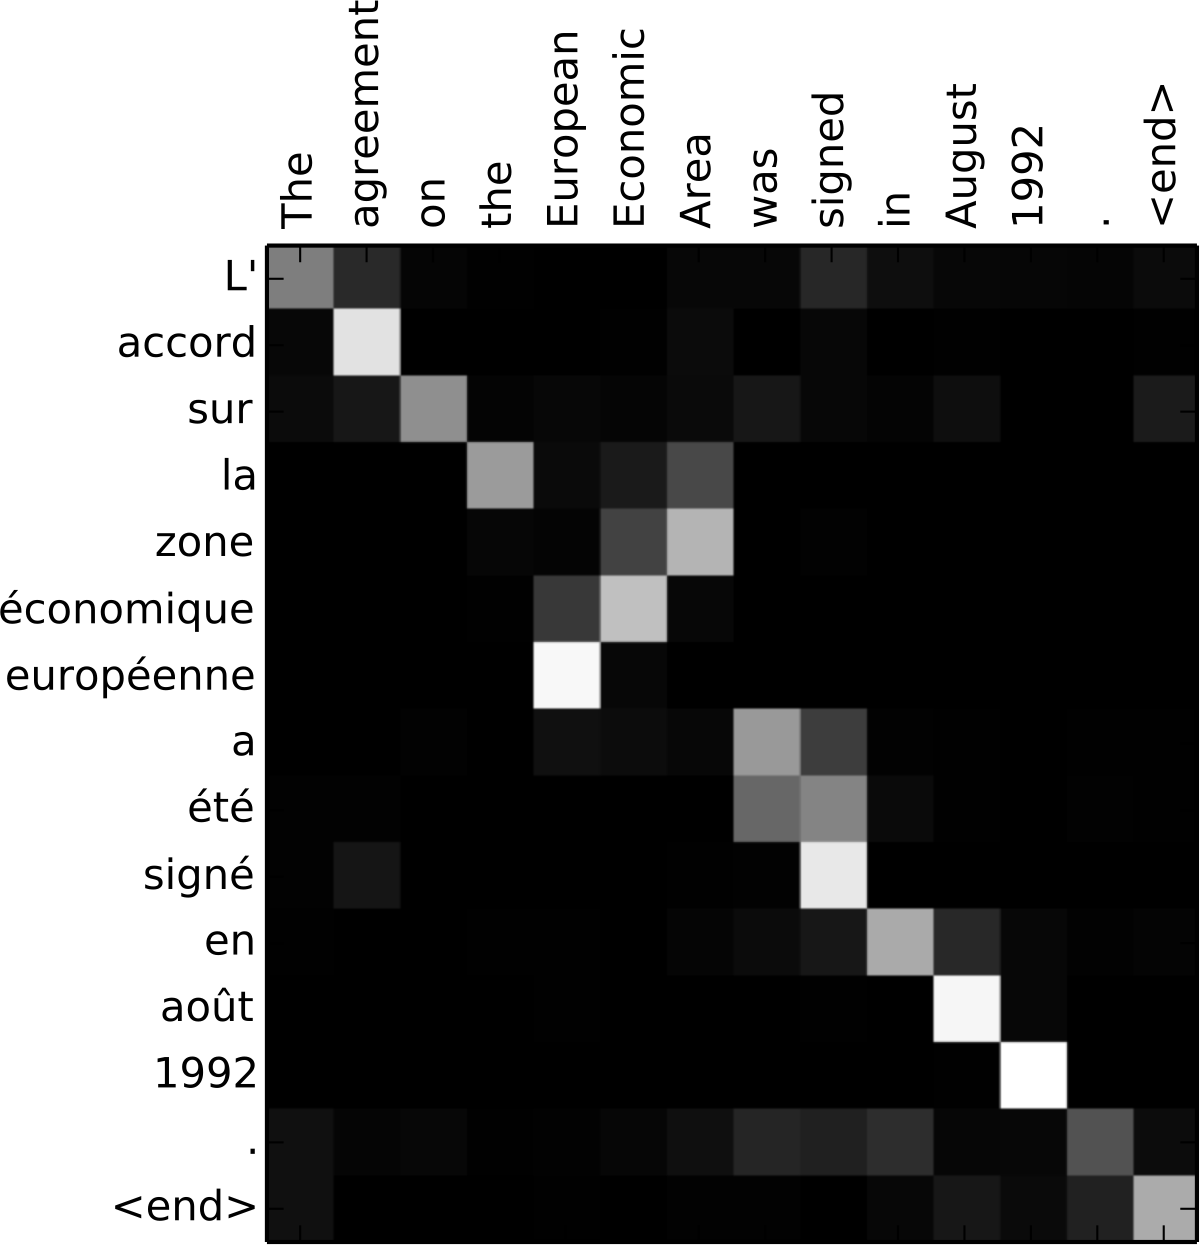

* 利用RNN的encoder-decoder模型存在的问题：
    1. 计算是顺序进行的，也即没办法并行处理输入序列

# Transformer 建模范式
*self-attention*: 一种完全放弃RNN的attention。（细节详见Chapter 3）

基本思路：让attention对同一层的所有state进行操作。如下图，encoder和decoder都有自己的self-attention机制，他们的输出都是feed-forward neural networks(FF NNs). 这一结构可以比RNN训练的快很多。
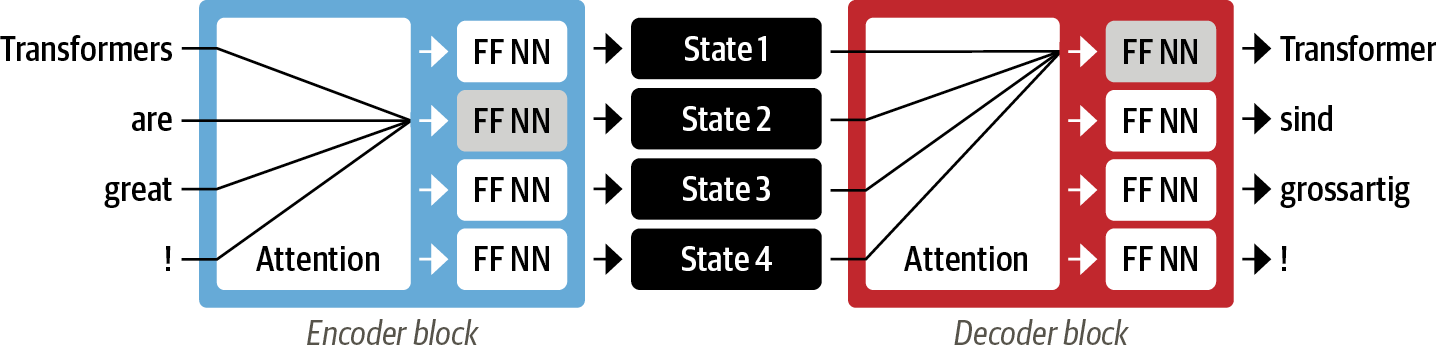

# NLP中的迁移学习
## CV中的迁移学习

在实际工程中，CV经常用某个在一个任务上训练好的CNN如ResNet，然后在fine-tune到另一个新的任务。
1. 优点：使用在原任务上已经学到的信息，训练效率提高，不需要
2. 结构：这种方式将模型分为body和head，head就是某个具体任务的网络。
3. 学习过程：控制body参数训练head参数

## NLP中的迁移学习
* NLP迁移训练的奇点：ULMFiT（2018），打破一直以来NLP需要大量标注数据才能有好的模型训练结果的现状，达到CV中的迁移学习的效果
* ULMFiT: 一个通用型LSTM模型预训练框架


### ULMFiT

三步骤：
1. Pretraining：  
    训练初始目标：根据先前单词预测下一个单词。注意此步骤不需要标记好的数据，数据来源广泛如Wikipedia
2. Domain adaption：  
    adapt到某个子领域的语料库（如IMDB），该语言建模过程同第一步，但是预测词变为目标语料库中的词
3. Fine-tuning:  
    语言模型为解决目标任需要使用分类层去fine-tune，如影评的情感分类
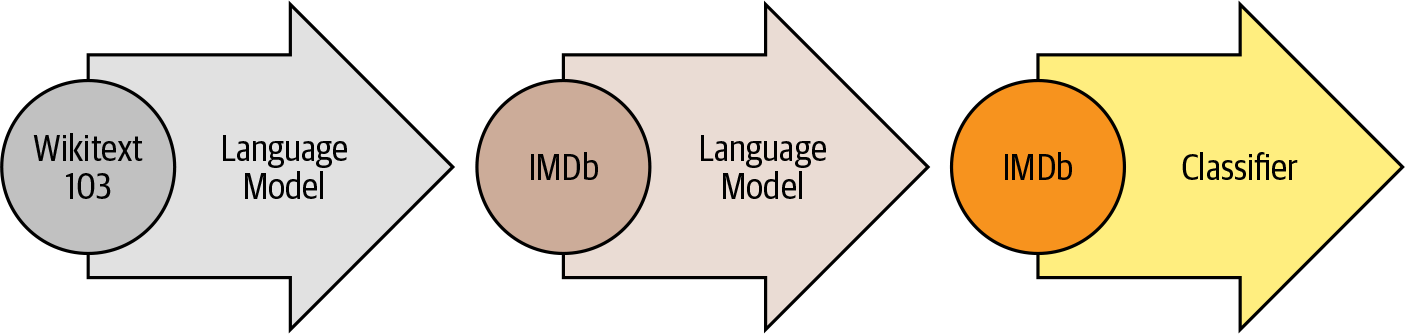

ULMFiT为Transformer提供了一个预训练框架，使得迁移学习+self-attention为NLP带来突破性进展

2018年的重大模型：GPT & BERT
* GPT：
    只用了Transformer架构中decoder部分，语言建模过程同ULMFiT。训练数据是BookCorpus，包括7000本未出版的书籍
* BERT：
    使用了Transformer架构中encoder部分，语言建模过程是maked language modeling。该语言建模过程是预测文本中随机被遮住的词。
    举例：“I looked at my [MASK] and saw that [MASK] was late.”模型需要去预测被遮住的词中最可能的词。BERT是在BookCorpus和英文维基百科训练的

# A Tour of Tranformer Applications

In [1]:
#熟悉transoformers的pipeline

text = """Dear Amazon, last week I ordered an Optimus Prime action figure
from your online store in Germany. Unfortunately, when I opened the package,
I discovered to my horror that I had been sent an action figure of Megatron
instead! As a lifelong enemy of the Decepticons, I hope you can understand my
dilemma. To resolve the issue, I demand an exchange of Megatron for the
Optimus Prime figure I ordered. Enclosed are copies of my records concerning
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""


## Text Classification

In [2]:
from transformers import pipeline
#默认情况下text-classification使用的是情感分类模型
classifier = pipeline("text-classification")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
Downloading: 100%|██████████| 629/629 [00:00<00:00, 126kB/s]
Downloading: 100%|██████████| 255M/255M [00:07<00:00, 37.5MB/s] 
Downloading: 100%|██████████| 48.0/48.0 [00:00<00:00, 12.1kB/s]
Downloading: 100%|██████████| 226k/226k [00:00<00:00, 295kB/s]  


In [3]:
import pandas as pd
outputs = classifier(text)
pd.DataFrame(outputs)

,label,score
0,NEGATIVE,0.901546


## Named Entity Recognition

In [4]:
ner_tagger = pipeline("ner", aggregation_strategy='simple')
outputs = ner_tagger(text)
pd.DataFrame(outputs)
#ORG (organization), LOC (location), or PER (person), MISC (miscellaneous)無法識別

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english)
Downloading: 100%|██████████| 998/998 [00:00<00:00, 502kB/s]
Downloading: 100%|██████████| 1.24G/1.24G [01:09<00:00, 19.1MB/s]  
Downloading: 100%|██████████| 60.0/60.0 [00:00<00:00, 60.2kB/s]
Downloading: 100%|██████████| 208k/208k [00:00<00:00, 373kB/s]  


,entity_group,score,word,start,end
0,ORG,0.879010,Amazon,5,11
1,MISC,0.990859,Optimus Prime,36,49
2,LOC,0.999755,Germany,90,97
3,MISC,0.556570,Mega,208,212
4,PER,0.590256,##tron,212,216
5,ORG,0.669692,Decept,253,259
6,MISC,0.498349,##icons,259,264
7,MISC,0.775362,Megatron,350,358
8,MISC,0.987854,Optimus Prime,367,380
9,PER,0.812096,Bumblebee,502,511


## Question Answering

In [ ]:
reader = pipeline("question-answering")
question = "What does the customer want?"
outputs = reader(question=question, context=text)
pd.DataFrame([outputs])

## Summarization

In [ ]:
summarizer = pipeline("summarization")
outputs = summarizer(text, max_length=45, clean_up_tokenization_spaces=True)
print(outputs[0]['summary_text'])

## Translation

In [ ]:
translator = pipeline("translation_en_to_de",model="Helsinki-NLP/opus-mt-en-de")
outputs = translator(text, clean_up_tokenization_spaces=True, min_length=100)
print(outputs[0]['translation_text'])

## Text Generation

In [ ]:
generator = pipeline("text-generation")
response = "Dear Bumblebee, I am sorry to hear that your order was mixed up."
prompt = text + "\n\nCustomer service response:\n" + response
outputs = generator(prompt, max_length = 200)
print(outputs[0]['generated_text'])

# The Hugging Face Ecosystem

Hugging Face生态系统由两部分组成：
1. library家族：提供代码
2. Hub：提供模型权重、数据集、评估指标的脚本、文档等
> 另外Hub还可以让你直接交互的测试任意模型（Model card）

Tokenizers：可以快速用各种方法分词
Accelerate：在Chapter 10模型的加速和压缩部署。Accelerate在最后训练层增加一层